# Gradient Descent From Scratch

Gradient descent is an iterative optimization method for finding local minima going against the direction of **gradient**. Conversely, it can be used for maximization tasks following the path of gradient to reach a local maximum. Suppose a function for polynomial fitting:

$\hat{y} = ax^3 + bx^2 + cx + d$

Set a loss function:

$F(x) = \sum^{N}_{i=0}(y - \hat{y}_i)^2$

Calculating the gradient with

$\nabla F(x) = \dfrac{\partial F}{\partial a}e_1 + \dfrac{\partial F}{\partial b}e_2 + \dfrac{\partial F}{\partial c}e_3 + \dfrac{\partial F}{\partial d}e_4$

gives us the inverse direction of the **flow**. We need to descend in this flow, until we reach a local minimum. We could check whether we have arrived to a local minimum or not, by checking the gradient. Unless it is zero, it will tell us that we are getting close to an extremum or not, and its magnitude indicates the velocity we are moving towards gradient. So we update our parameters depending on gradient

$a = a + \beta \dfrac{\partial F}{\partial a}$

by adding the term $\beta$ we control the velocity and this term is called **learning rate**. Above operation is iteratively performed for all parameters on all dataset multiple times, until predetermined criteria are met. This criteria could be convergence, a baseline error value or number of iterations, etc.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
learning_rate = 0.001
max_iter = 200

In [3]:
def predictor(x,a,b,c,d):
    """Main model for regression task."""
    return a*x**3 + b*x**2 + c*x + d

def f(y_true,y_pred):
    """Loss function."""
    return np.sum((y_true-y_pred)**2)

# Derivatives for gradient
def dfda(x,y_true,y_pred):
    return 2*(y_true-y_pred)*(x**3)

def dfdb(x,y_true,y_pred):
    return 2*(y_true-y_pred)*(x**2)

def dfdc(x,y_true,y_pred):
    return 2*(y_true-y_pred)*x

def dfdd(y_true,y_pred):
    return 2*(y_true-y_pred)

In [4]:
# create the dataset
y,x = np.histogram(np.random.randn(200))
y = np.cumsum(y)
x = x[1:]

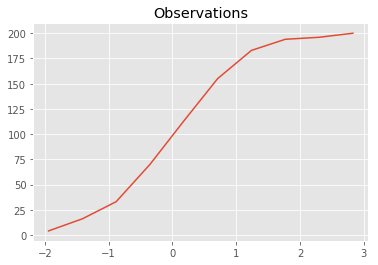

In [5]:
plt.plot(x,y)
plt.title('Observations')
plt.show()

In [6]:
# randomly initialize weights
a, b, c, d = np.random.randn(4)

In [7]:
# train the model by appling gradient descent
errors, coefs = [], []
for i in range(max_iter): # epoch
    for j in range(x.shape[0]):
        pred = predictor(x[j],a,b,c,d)
        a = a + learning_rate * dfda(x[j],y[j],pred)
        b = b + learning_rate * dfdb(x[j],y[j],pred)
        c = c + learning_rate * dfdc(x[j],y[j],pred)
        d = d + learning_rate * dfdd(y[j],pred)
    error = np.mean(np.abs(y-predictor(x,a,b,c,d)))
    if i % 10 == 0:
        print('MAE = {:.2f}'.format(error))
    errors.append(error)
    coefs.append((a,b,c,d))

MAE = 82.75
MAE = 65.58
MAE = 59.80
MAE = 53.79
MAE = 48.15
MAE = 43.02
MAE = 38.41
MAE = 34.27
MAE = 30.57
MAE = 27.26
MAE = 24.29
MAE = 21.64
MAE = 19.26
MAE = 17.13
MAE = 15.23
MAE = 13.55
MAE = 12.35
MAE = 11.35
MAE = 10.44
MAE = 9.62


In [8]:
# parameters
print('a = {:.2f}\nb = {:.2f}\nc = {:.2f}\nd = {:.2f}'.format(a,b,c,d))

a = -4.81
b = 4.97
c = 65.56
d = 83.64


In [9]:
errors = np.asarray(errors)
coefs = np.asarray(coefs)

In [10]:
pred = predictor(x,a,b,c,d)

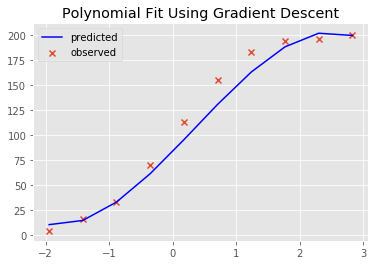

In [11]:
plt.scatter(x,y,label='observed',marker='x')
plt.plot(x,pred,label='predicted',c='blue')
plt.legend()
plt.title('Polynomial Fit Using Gradient Descent')
plt.show()

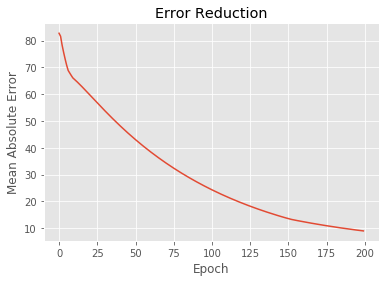

In [12]:
plt.plot(errors)
plt.title('Error Reduction')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.show()

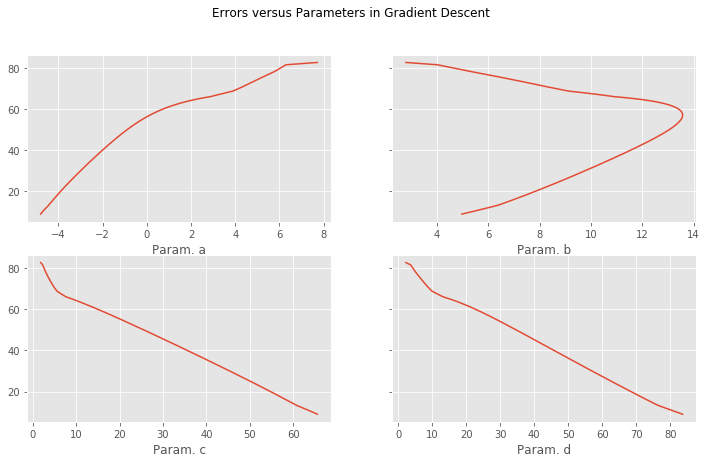

In [13]:
fig, axs = plt.subplots(2, 2,figsize=(12,6.75),sharey=True)
fig.suptitle('Errors versus Parameters in Gradient Descent')
axs[0,0].plot(coefs[:,0],errors)
axs[0,0].set_xlabel('Param. a')
axs[0,1].plot(coefs[:,1],errors)
axs[0,1].set_xlabel('Param. b')
axs[1,0].plot(coefs[:,2],errors)
axs[1,0].set_xlabel('Param. c')
axs[1,1].plot(coefs[:,3],errors)
axs[1,1].set_xlabel('Param. d')
plt.show()

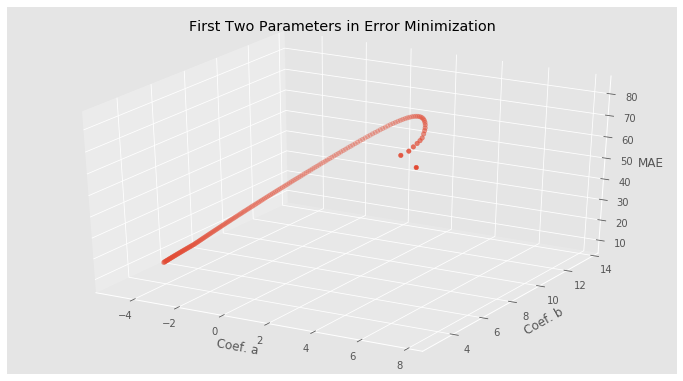

In [14]:
# error reduction path in three dimensions
fig = plt.figure(figsize=(12,6.75))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coefs[:,0], coefs[:,1], errors)
plt.title('First Two Parameters in Error Minimization')
ax.set_xlabel('Coef. a')
ax.set_ylabel('Coef. b')
ax.set_zlabel('MAE')
plt.show()

In [15]:
# contour limits
m = 4
n_res = 300
XX, YY = np.meshgrid(np.linspace(-m*a if -m*a < np.min(coefs[:,0])*2 else np.min(coefs[:,0])*2,
                                 m*a if m*a > np.max(coefs[:,0])*2 else np.max(coefs[:,0])*2, n_res),
                     np.linspace(-m*b if -m*b < np.min(coefs[:,1])*2 else np.min(coefs[:,1])*2,
                                 m*b if m*b > np.max(coefs[:,1])*2 else np.max(coefs[:,1])*2, n_res))
Z = np.asarray([f(y,predictor(x,aa,bb,c,d)) for aa,bb in zip(XX.ravel(), YY.ravel())])
Z = Z.reshape((n_res,n_res))

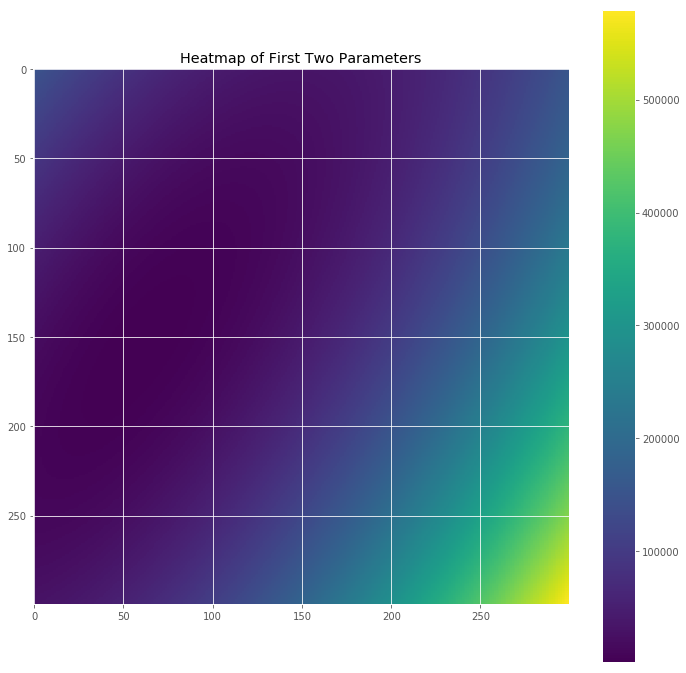

In [16]:
# Colorcode shows the error
fig = plt.figure(figsize=(12,12))
plt.imshow(Z, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of First Two Parameters')
plt.show()

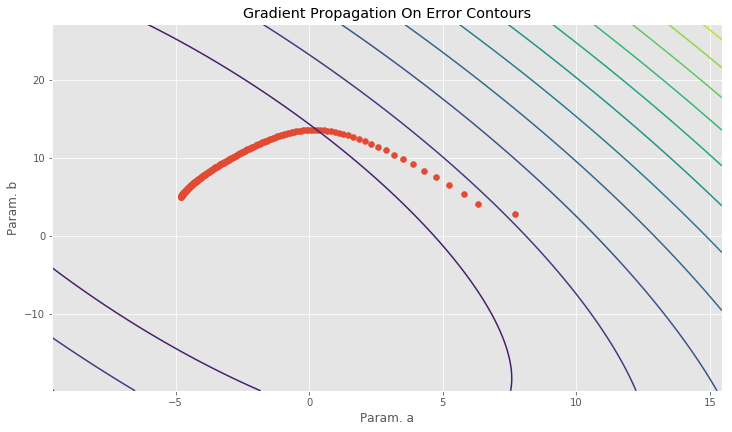

In [17]:
# contour plot parameters
fig = plt.figure(figsize=(12,6.75))
plt.contour(XX, YY, Z,levels=12)
plt.scatter(coefs[:, 0], coefs[:, 1])
plt.title('Gradient Propagation On Error Contours')
plt.xlabel('Param. a')
plt.ylabel('Param. b')
plt.show()